#  Exploratory Data Analysis & Classification on Heart Disease Data

__Author - Shadi Mahdiani__  
__Email - sh.mahdiani@yahoo.com__

__Dataset - UCI Heart Disease Dataset__  
https://archive.ics.uci.edu/ml/datasets/Heart+Disease  

This dataset gives a number of variables along with a target condition of having or not having heart disease.   
First, an extensive data exploratory analysis is performed. Second, the data is used to train a random forest model to predict presence of heart disease or not, and then the model is investigated using ML explainability tools and techniques.

## Exploratory Data Analysis

In [1]:
# Importing the appropriate libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from bubbly.bubbly import bubbleplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
data = pd.read_excel('Heart.xlsx', 'heart')

In [3]:
# Rename the columns
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
                'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope',
                'num_major_vessels', 'thallium_stress_test', 'target']

In [4]:
data.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thallium_stress_test,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here is a short description of the columns:

__age__: Age in years  
__sex__: Sex (0 or 1)  
__chest_pain_type__: Chest pain experienced (0-3)  
__resting_blood_pressure__: Resting blood pressure in mmHg
__cholesterol__: Cholesterol in mg/dl  
__fasting_blood_sugar__: Fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)  
__rest_ecg__: Resting electrocardiographic measurement (0-2)  
__max_heart_rate_achieved__: Maximum heart rate achieved  
__exercise_induced_angina__: Exercise induced angina (1 = yes; 0 = no)  
__st_depression__: ST depression induced by exercise relative to rest  
__st_slope__: Slope of the peak exercise ST segment (0-2)  
__num_major_vessels__: Number of major vessels (0-4)  
__thallium_stress_test__: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)(0-3)  
__target__: Heart disease (0 = no, 1 = yes)  

In [5]:
# Define types of the features: binary, categorical, ordinal and numerical & target

binary = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']
categorical = ['chest_pain_type', 'rest_ecg', 'st_slope', 'thallium_stress_test'] # thal is supposed to be either 3, 6 or 7 based on the description sheet
ordinal = ['num_major_vessels']
numerical = ['age', 'st_depression', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved']
target = ['target']

In [6]:
data.shape

(303, 14)

In [7]:
data.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thallium_stress_test         int64
target                       int64
dtype: object

In [8]:
# Convert categorical columns to type object for further dummy encoding

data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thallium_stress_test'] = data['thallium_stress_test'].astype('object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thallium_stress_test     303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(9), o

In [10]:
# Number of duplicates
data.duplicated().sum()

1

### Exploratory Analysis

In [11]:
# Mean and std of numerical parameters for negative cases
data[data.target == 0][numerical + ordinal].describe().loc[['mean', 'std']]

,age,st_depression,resting_blood_pressure,cholesterol,max_heart_rate_achieved,num_major_vessels
mean,56.601449,1.585507,134.398551,251.086957,139.101449,1.166667
std,7.962082,1.300340,18.729944,49.454614,22.598782,1.043460


In [12]:
# Mean and std of numerical parameters for positive cases
data[data.target == 1][numerical + ordinal].describe().loc[['mean', 'std']]

,age,st_depression,resting_blood_pressure,cholesterol,max_heart_rate_achieved,num_major_vessels
mean,52.496970,0.583030,129.303030,242.230303,158.466667,0.363636
std,9.550651,0.780683,16.169613,53.552872,19.174276,0.848894


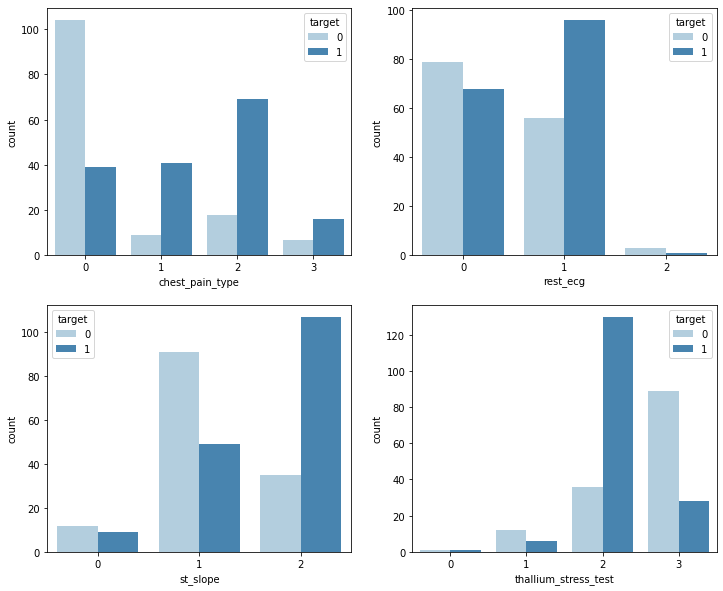

In [13]:
# Bar plots of catrgorical parameters for both positive and negative cases
fig = plt.figure(figsize=(12, 10))

for indx, col in enumerate(categorical):
    indx = indx + 1
    ax = fig.add_subplot(2, 2, indx)
    sns.countplot(data=data, x=col, hue='target', ax=ax, palette = 'Blues')

plt.show()

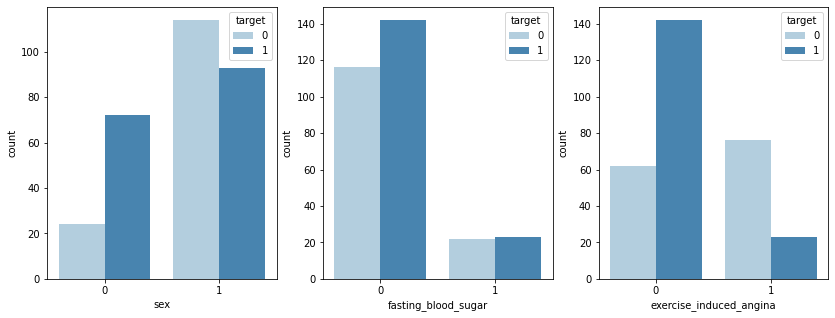

In [14]:
# Bar plots of binary parameters for both positive and negative cases

fig = plt.figure(figsize=(14, 5))

for indx, col in enumerate(binary):
    indx = indx + 1
    ax = fig.add_subplot(1, 3, indx)
    sns.countplot(data=data, x=col, hue='target', ax=ax, palette = 'Blues')

plt.show()

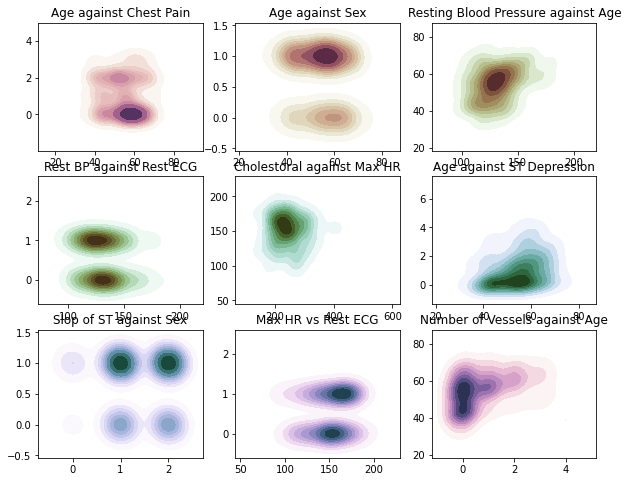

In [15]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = data['age'].values.astype('float64')
y = data['chest_pain_type'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(title = 'Age against Chest Pain')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['age'].values.astype('float64').astype('float64')
y = data['sex'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Sex')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['resting_blood_pressure'].values.astype('float64')
y = data['age'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(title = 'Resting Blood Pressure against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = data['resting_blood_pressure'].values.astype('float64')
y = data['rest_ecg'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set(title = 'Rest BP against Rest ECG')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['cholesterol'].values.astype('float64')
y = data['max_heart_rate_achieved'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Cholestoral against Max HR')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['age'].values.astype('float64')
y = data['st_depression'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set(title = 'Age against ST Depression')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = data['st_slope'].values.astype('float64')
y = data['sex'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set(title = 'Slop of ST against Sex')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['max_heart_rate_achieved'].values.astype('float64')
y = data['rest_ecg'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set(title = 'Max HR vs Rest ECG')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['num_major_vessels'].values.astype('float64')
y = data['age'].values.astype('float64')
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
tmp = axes[2,2].set(title = 'Number of Vessels against Age')

In [16]:
# Correlation plot - heatmap
heatmap_data = [
    go.Heatmap(
        z=data.astype(float).corr().values, # Generating the Pearson correlation
        x=data.columns.values,
        y=data.columns.values,
        colorscale='Blues')]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 850, height = 750)


fig = go.Figure(data=heatmap_data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. In the case that we have quite a lot of correlated features one could perhaps apply a technique such as Principal Component Analysis (PCA) to reduce the feature space.

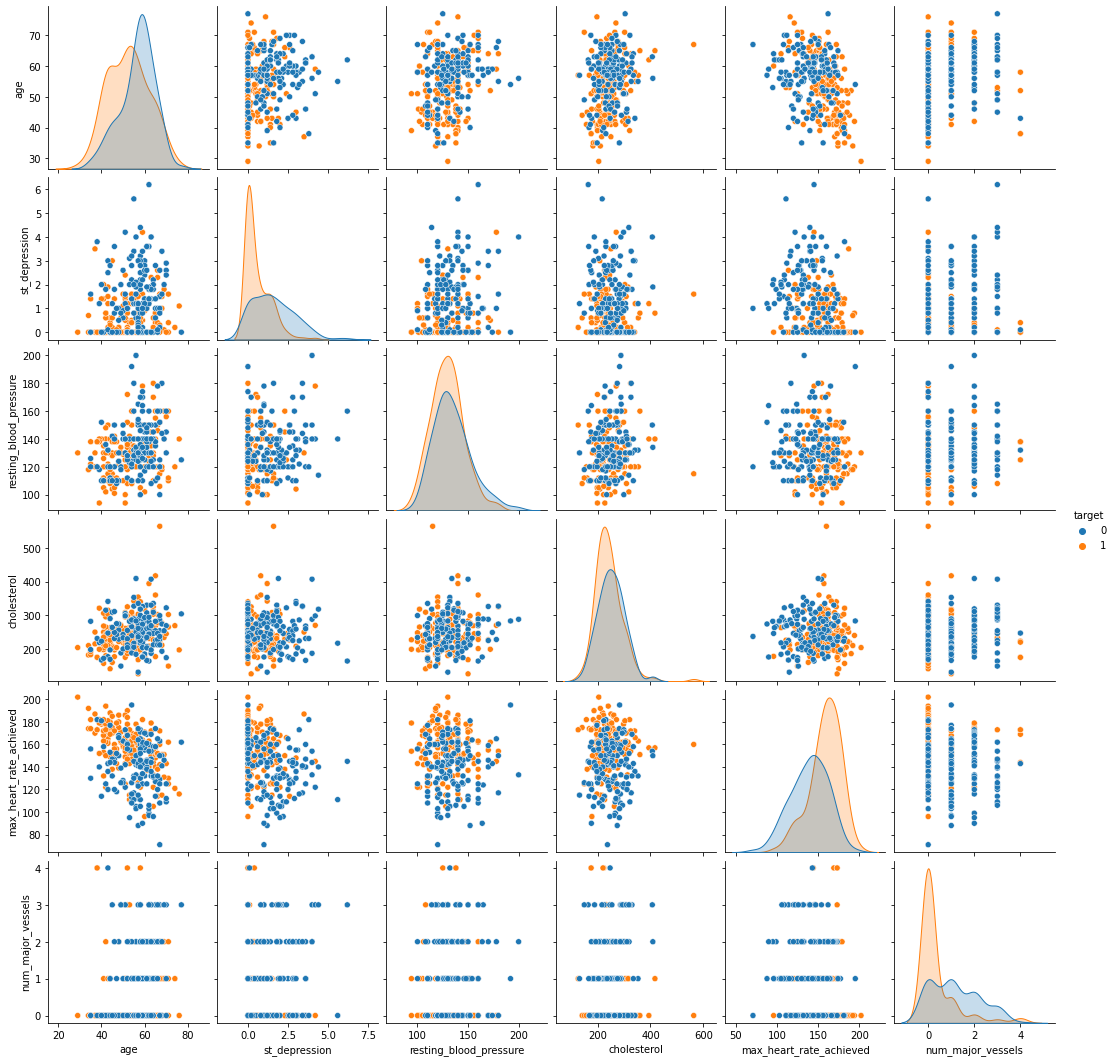

In [17]:
# Distribution plot for numerical and ordinal parameters with respect to target

g = sns.pairplot(data[numerical + ordinal + target], hue='target')

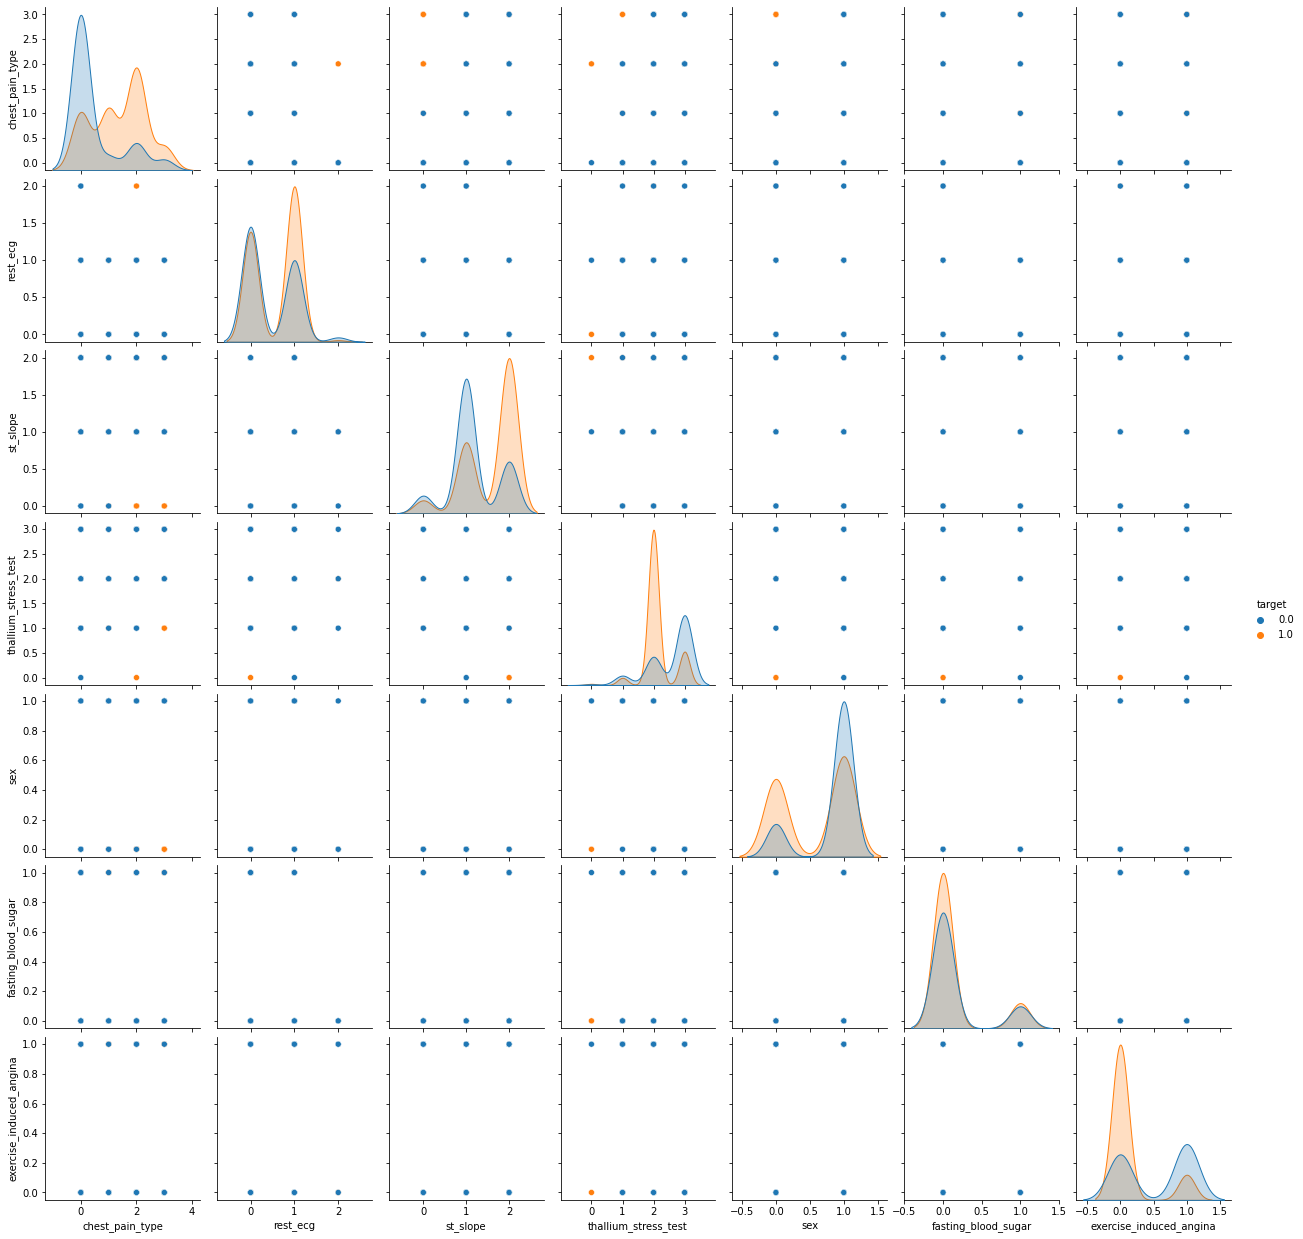

In [18]:
# Distribution plot for categorical and binary parameters with respect to target

g = sns.pairplot(data[categorical + binary + target].astype('float64'), hue='target')

In [19]:
# bubble plot presentation, showing how data varies during the age range

figure = bubbleplot(dataset = data,
                    x_column = 'resting_blood_pressure',
                    y_column = 'cholesterol',
                    bubble_column = 'sex',
                    time_column = 'age',
                    size_column = 'st_depression',
                    color_column = 'sex',
                    x_title = "Resting Blood Pressure",
                    y_title = "Cholestrol", title = 'BP vs Chol vs Age vs Sex vs ST depression',
                    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})
plt.savefig('pinkstars.jpeg',format='jpeg')


<Figure size 432x288 with 0 Axes>

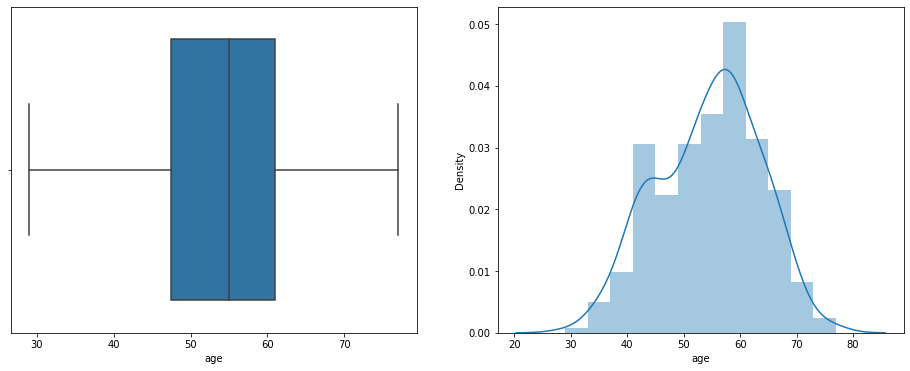

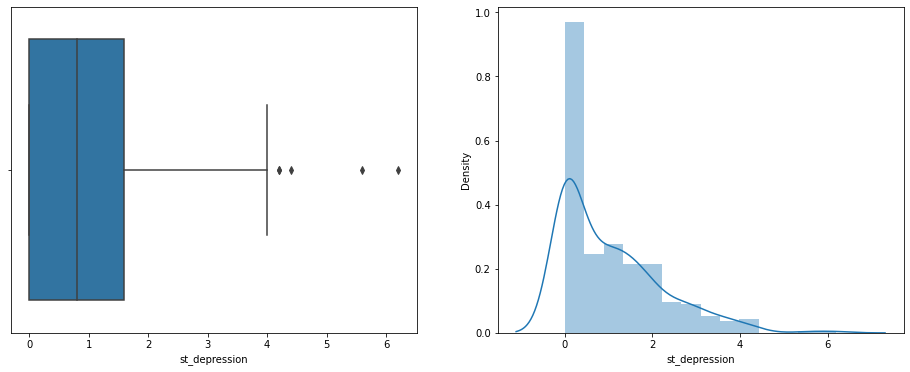

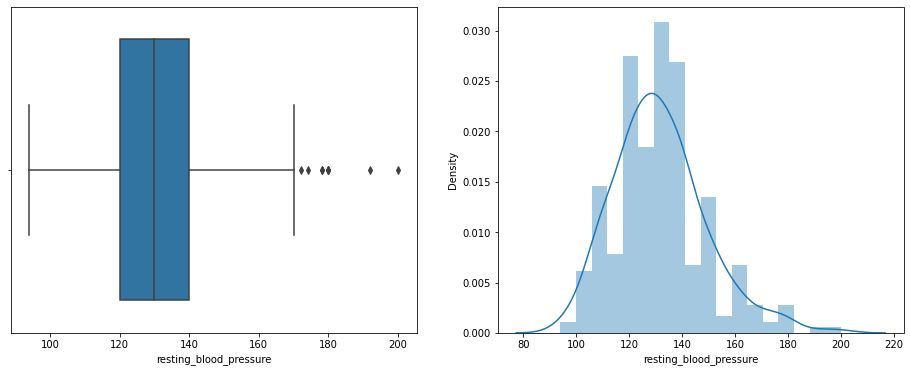

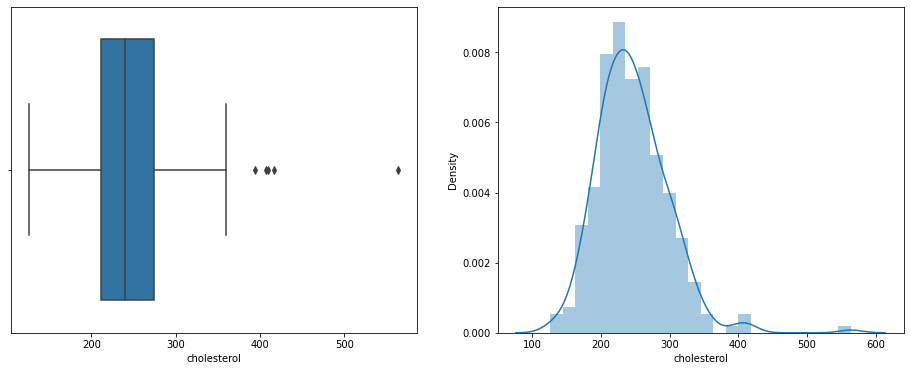

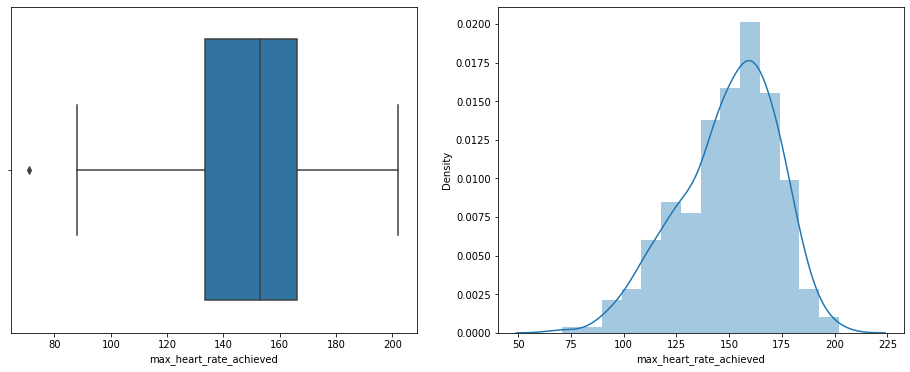

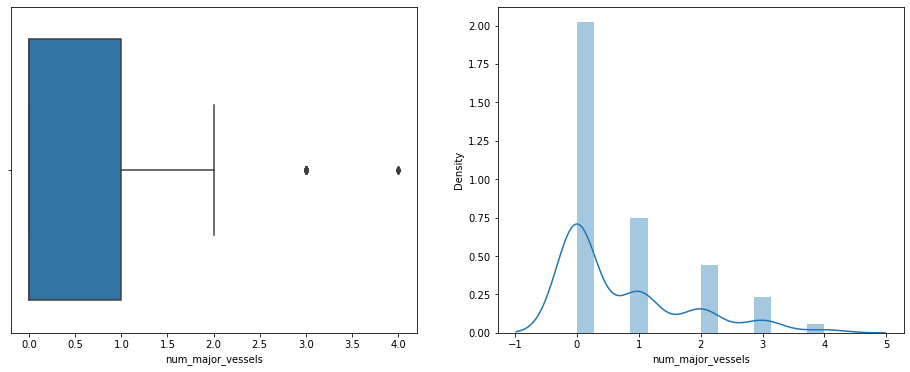

In [20]:
# Investigating outliers and distribution of the numerical & ordinal parameters

for col in data[numerical+ordinal].columns:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2 ,1)
    sns.boxplot(data[col])
    plt.subplot(1, 2, 2)
    sns.distplot(data[col], bins='auto')
    plt.show()

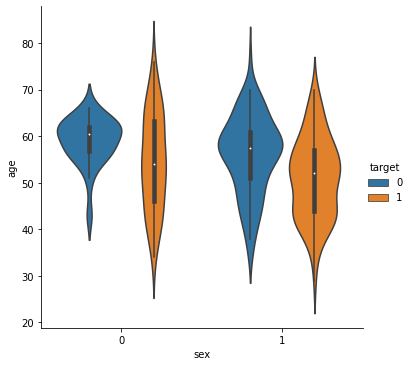

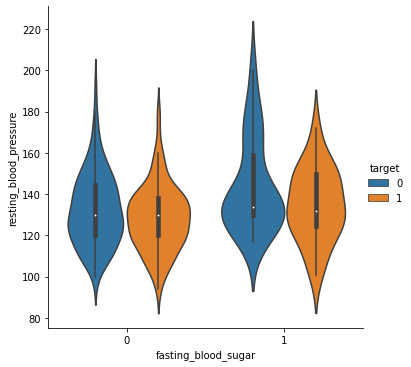

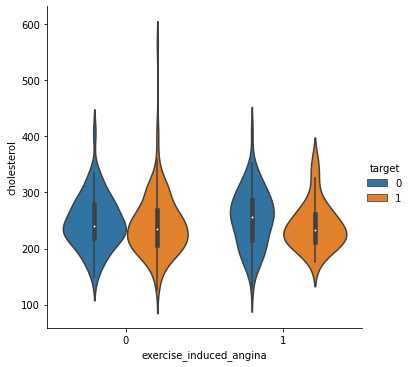

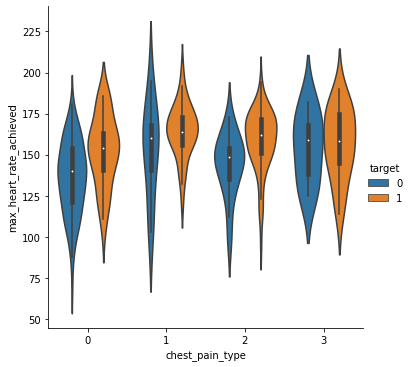

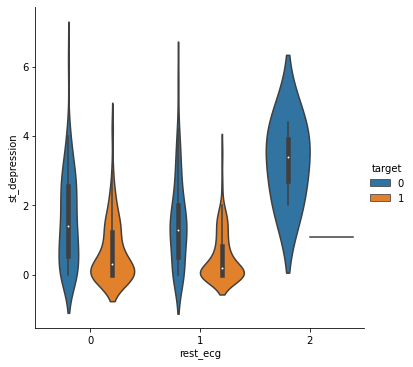

In [21]:
# A representation of box-plot and distribution plot for some of the parameters with respect to positive and negative cases

sns.catplot(x='sex', y='age', hue='target', kind='violin', data=data)
sns.catplot(x='fasting_blood_sugar', y='resting_blood_pressure', hue='target', kind='violin', data=data)
sns.catplot(x='exercise_induced_angina', y='cholesterol', hue='target', kind='violin', data=data)
sns.catplot(x='chest_pain_type', y='max_heart_rate_achieved', hue='target', kind='violin', data=data)
sns.catplot(x='rest_ecg', y='st_depression', hue='target', kind='violin', data=data)

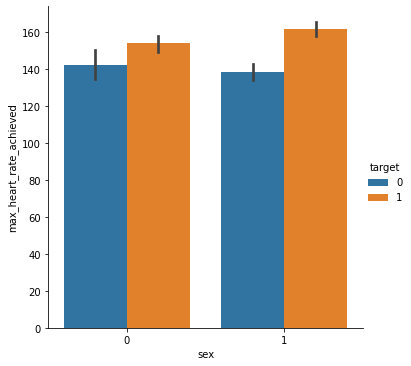

In [22]:
# How max heart rate achieved is different with respect to sex for both positive and negative cases

sns.catplot(x='sex', y='max_heart_rate_achieved', hue='target', kind='bar', data=data)

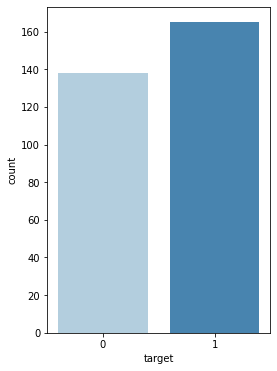

In [23]:
# Distribution of target column

fig = plt.figure(figsize=(4, 6))
sns.countplot(data['target'], palette = 'Blues')
plt.show()

Data is almost balanced between both classes.

In [24]:
# 3D illustration of Cholesterol, RestBP and age

trace = go.Scatter3d(
    x = data['cholesterol'],
    y = data['resting_blood_pressure'],
    z = data['age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs BP vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Blood Pressure'),
            zaxis = dict(title  = 'Age')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

### Data preparation

In [25]:
# Changing values of categorical variables to improve the interpretation later on

data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'zero'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'one'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'two'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'three'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'zero'
data['rest_ecg'][data['rest_ecg'] == 1] = 'one'
data['rest_ecg'][data['rest_ecg'] == 2] = 'two'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'zero'
data['st_slope'][data['st_slope'] == 1] = 'one'
data['st_slope'][data['st_slope'] == 2] = 'two'

data['thallium_stress_test'][data['thallium_stress_test'] == 0] = 'NA'
data['thallium_stress_test'][data['thallium_stress_test'] == 1] = 'normal'
data['thallium_stress_test'][data['thallium_stress_test'] == 2] = 'fixed defect'
data['thallium_stress_test'][data['thallium_stress_test'] == 3] = 'reversable defect'

In [26]:
# Change type of categorical variables to object (categorical) for using get_dummies function in the next step
for col, value in data[categorical + binary].iteritems():
    data[col] = data[col].astype('category')

In [27]:
# For the categorical varibles, we need to create dummy variables.
# here the first category of each variable is also dropped.
data = pd.get_dummies(data, drop_first=True)
# if column type is not category, get_dummies doesn't do anything unless specifying name of the columns
data.head(10)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_three,chest_pain_type_two,chest_pain_type_zero,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_two,rest_ecg_zero,exercise_induced_angina_yes,st_slope_two,st_slope_zero,thallium_stress_test_fixed defect,thallium_stress_test_normal,thallium_stress_test_reversable defect
0,63,145,233,150,2.3,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
5,57,140,192,148,0.4,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0
6,56,140,294,153,1.3,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
7,44,120,263,173,0.0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
8,52,172,199,162,0.5,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1
9,57,150,168,174,1.6,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0


In [28]:
dataset = data.copy()

## Applying machine learning algorithms

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [31]:
X = dataset.drop('target', axis=1)
y = dataset.target

# target = data['target']
# data = data.drop(['target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [32]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.881720    0.873950  0.877358    0.877835      0.877505
recall      0.845361    0.904348  0.877358    0.874854      0.877358
f1-score    0.863158    0.888889  0.877358    0.876023      0.877116
support    97.000000  115.000000  0.877358  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 11 104]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.790698   0.854167  0.824176   0.822432      0.825571
recall      0.829268   0.820000  0.824176   0.824634      0.824176
f1-score    0.809524   0.836735  0.824176   0.823129      0.824475
support    41.000000  50.000000  0.824176  91.000000     91.000000
_____________

In [34]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,82.417582


### K-nearest neighbors

In [35]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 77.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.781609    0.768000  0.773585    0.774805      0.774227
recall      0.701031    0.834783  0.773585    0.767907      0.773585
f1-score    0.739130    0.800000  0.773585    0.769565      0.772149
support    97.000000  115.000000  0.773585  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[68 29]
 [19 96]]

Test Result:
Accuracy Score: 65.93%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.631579   0.679245  0.659341   0.655412      0.657769
recall      0.585366   0.720000  0.659341   0.652683      0.659341
f1-score    0.607595   0.699029  0.659341   0.653312      0.657834
support    41.000000  50.000000  0.659341  91.000000     91.000000
_________________

In [36]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,82.417582
1,K-nearest neighbors,77.358491,65.934066


### Support Vector Machine

In [37]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 54.95%
_______________________________________________
CLASSIFICATION REPORT:
              0          1  accuracy  macro avg  weighted avg
precision   0.0   0.549451  0.549451   0.274725      0.301896
recall      0.0   1.000000  0.549451   0.500000      0.549451
f1-score    0.0   0.709220  0.549451   0.354610      0.389681
support    41.0  50.000000  0.549451  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[ 0 41]
 [ 0 50]]



In [38]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,82.417582
1,K-nearest neighbors,77.358491,65.934066
2,Support Vector Machine,100.000000,54.945055


### Decision Tree

In [39]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 79.12%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.739130   0.844444  0.791209   0.791787      0.796995
recall      0.829268   0.760000  0.791209   0.794634      0.791209
f1-score    0.781609   0.800000  0.791209   0.790805      0.791714
support    41.000000  50.000000  0.791209  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [40]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,82.417582
1,K-nearest neighbors,77.358491,65.934066
2,Support Vector Machine,100.000000,54.945055
3,Decision Tree Classifier,100.000000,79.120879


### Random Forest

In [41]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.785714   0.836735  0.813187   0.811224      0.813747
recall      0.804878   0.820000  0.813187   0.812439      0.813187
f1-score    0.795181   0.828283  0.813187   0.811732      0.813369
support    41.000000  50.000000  0.813187  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [42]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,82.417582
1,K-nearest neighbors,77.358491,65.934066
2,Support Vector Machine,100.000000,54.945055
3,Decision Tree Classifier,100.000000,79.120879
4,Random Forest Classifier,100.000000,81.318681


### XGBoost

In [43]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.825000   0.843137  0.835165   0.834069      0.834966
recall      0.804878   0.860000  0.835165   0.832439      0.835165
f1-score    0.814815   0.851485  0.835165   0.833150      0.834963
support    41.000000  50.000000  0.835165  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [44]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,82.417582
1,K-nearest neighbors,77.358491,65.934066
2,Support Vector Machine,100.000000,54.945055
3,Decision Tree Classifier,100.000000,79.120879
4,Random Forest Classifier,100.000000,81.318681
5,XGBoost Classifier,100.000000,83.516484


## Applying Machine Learning Algorithms Using Hyperparameter Tuning

### Logistic Regression Hyperparameter Tuning

In [45]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.896552    0.848000  0.867925    0.872276      0.870215
recall      0.804124    0.921739  0.867925    0.862931      0.867925
f1-score    0.847826    0.883333  0.867925    0.865580      0.867087
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 78  19]
 [  9 106]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [46]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.792453,85.714286


### K-nearest neighbors Hyperparameter Tuning

Maximum KNN score on the test data: 69.23%


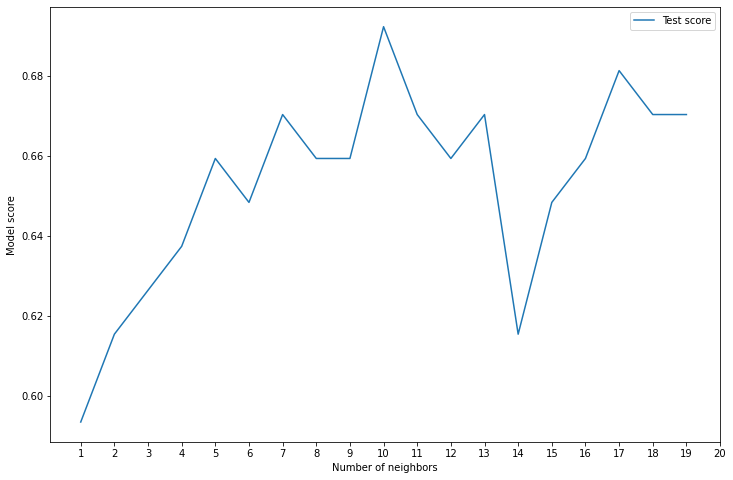

In [47]:
train_score = []
test_score = []
neighbors = range(1, 20)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
#    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(12, 8))

#plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 69.34%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.653846    0.731481  0.693396    0.692664      0.695960
recall      0.701031    0.686957  0.693396    0.693994      0.693396
f1-score    0.676617    0.708520  0.693396    0.692569      0.693923
support    97.000000  115.000000  0.693396  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[68 29]
 [36 79]]

Test Result:
Accuracy Score: 69.23%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.651163   0.729167  0.692308   0.690165      0.694022
recall      0.682927   0.700000  0.692308   0.691463      0.692308
f1-score    0.666667   0.714286  0.692308   0.690476      0.692831
support    41.000000  50.000000  0.692308  91.000000     91.000000
_________________

In [49]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.792453,85.714286
1,Tuned K-nearest neighbors,69.339623,69.230769


### Support Vector Machine Hyperparameter Tuning

In [50]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":[0.1, 0.5, 1, 2, 5, 10, 20], 
          "gamma":[0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1], 
          "kernel":['linear', 'rbf']}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   36.7s


Best params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.870968    0.865546  0.867925    0.868257      0.868027
recall      0.835052    0.895652  0.867925    0.865352      0.867925
f1-score    0.852632    0.880342  0.867925    0.866487      0.867663
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 81  16]
 [ 12 103]]

Test Result:
Accuracy Score: 80.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.780488   0.82  0.802198   0.800244      0.802198
recall      0.780488   0.82  0.802198   0.800244      0.802198
f1-score    0.780488   0.82  0.802198   0.800244      0.802198
support    41.000000  50.00  0.80219

[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:  1.3min finished


In [51]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.792453,85.714286
1,Tuned K-nearest neighbors,69.339623,69.230769
2,Tuned Support Vector Machine,86.792453,80.219780


### Decision Tree Classifier Hyperparameter Tuning

In [52]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   13.5s


Best_params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.904762    0.835938  0.863208    0.870350      0.867428
recall      0.783505    0.930435  0.863208    0.856970      0.863208
f1-score    0.839779    0.880658  0.863208    0.860219      0.861954
support    97.000000  115.000000  0.863208  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 76  21]
 [  8 107]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.820513   0.826923  0.824176   0.823718      0.824035
recall      0.780488   0.860000  0.824176   0.820244      0.824176
f1-score    0.800000   0.8

[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   14.7s finished


In [53]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.792453,85.714286
1,Tuned K-nearest neighbors,69.339623,69.230769
2,Tuned Support Vector Machine,86.792453,80.219780
3,Tuned Decision Tree Classifier,86.320755,82.417582


### Random Forest Classifier Hyperparameter Tuning

In [68]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

# For faster training, instead of GridSearchCV, RandomizedSearchCV was used.
# rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)
rf_cv = RandomizedSearchCV(rf_clf, params_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


Best parameters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.946237    0.924370  0.933962    0.935303      0.934375
recall      0.907216    0.956522  0.933962    0.931869      0.933962
f1-score    0.926316    0.940171  0.933962    0.933243      0.933832
support    97.000000  115.000000  0.933962  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 88   9]
 [  5 110]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.785714   0.836735  0.813187   0.811224      0.813747
recall      0.804878   0.820000  0.813187   0.812439      0.813187


In [72]:
# Comparing RandomizedSearchCV method to the base model
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

base_model.fit(X_train, y_train)

print_score(base_model, X_train, y_train, X_test, y_test, train=True)
print_score(base_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.06%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.979798    1.000000  0.990566    0.989899      0.990757
recall      1.000000    0.982609  0.990566    0.991304      0.990566
f1-score    0.989796    0.991228  0.990566    0.990512      0.990573
support    97.000000  115.000000  0.990566  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  2 113]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.714286   0.857143   0.78022   0.785714      0.792779
recall      0.853659   0.720000   0.78022   0.786829      0.780220
f1-score    0.777778   0.782609   0.78022   0.780193      0.780432
support    41.000000  50.000000   0.78022  91.000000     91.000000
_____________

The model was overfitted when using base method. Therefore RandomizedSearchCV worked very well in performance
for both train and test sets.

In [74]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.792453,85.714286
1,Tuned K-nearest neighbors,69.339623,69.230769
2,Tuned Support Vector Machine,86.792453,80.219780
3,Tuned Decision Tree Classifier,86.320755,82.417582
4,Tuned Random Forest Classifier,93.396226,82.417582


### XGBoost Classifier Hyperparameter Tuning

In [73]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

params_grid = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_clf = XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'accuracy',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3360 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5282 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6032 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 9352 tasks      | elapsed:  2.9min


Best paramters: {'base_score': 0.99, 'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Train Result:
Accuracy Score: 95.75%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.968085    0.949153  0.957547    0.958619      0.957815
recall      0.938144    0.973913  0.957547    0.956029      0.957547
f1-score    0.952880    0.961373  0.957547    0.957126      0.957487
support    97.000000  115.000000  0.957547  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 91   6]
 [  3 112]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.790698   0.854167  0.824176   0.822432      0.825571
recall      0.829268   0.820000  0.824176   0.824634      0.824176
f1-sco

[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  2.9min finished


In [75]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,86.792453,85.714286
1,Tuned K-nearest neighbors,69.339623,69.230769
2,Tuned Support Vector Machine,86.792453,80.219780
3,Tuned Decision Tree Classifier,86.320755,82.417582
4,Tuned Random Forest Classifier,93.396226,82.417582
5,Tuned XGBoost Classifier,95.754717,82.417582


In [76]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.735849,82.417582
1,K-nearest neighbors,77.358491,65.934066
2,Support Vector Machine,100.000000,54.945055
3,Decision Tree Classifier,100.000000,79.120879
4,Random Forest Classifier,100.000000,81.318681
5,XGBoost Classifier,100.000000,83.516484


By comparing two results tables (results_df and tuning_results_df) we can see that the difference between training and testing sets are smaller which means are less likely that our models are overfitted. Decision Tree, Random Forest and XGBoost resulted in similar performances for testing set. 

### Features Importance for Random Forest and XGBoost models

In [106]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False).set_index('feature')

<AxesSubplot:title={'center':'Feature Importance - Random Forest'}, ylabel='feature'>

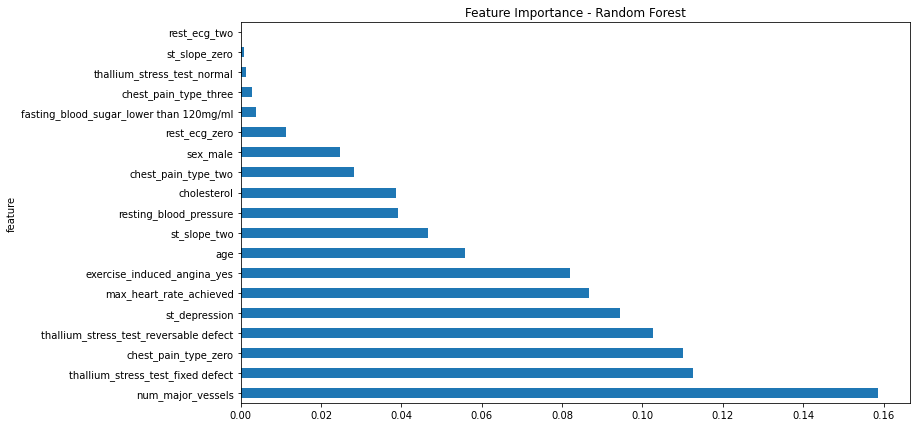

In [108]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False, title='Feature Importance - Random Forest')

<AxesSubplot:title={'center':'Feature Importance - XGBoost'}, ylabel='feature'>

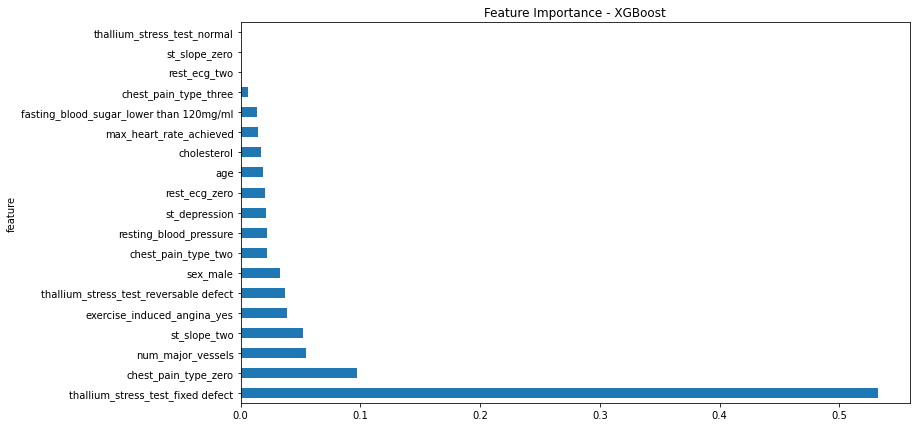

In [109]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False, title='Feature Importance - XGBoost')